<a href="https://colab.research.google.com/github/neelansh27/MNIST_model/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten
from tensorflow.keras.models import Model

In [14]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [15]:
# total no. of outputs/categories
K=len(np.unique(y_train))
K

10

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
# Since the Data is 2D, we have to convert it to 3D
# because CNN expects input of form "N x H x W x C"
x_train=np.expand_dims(x_train,-1) # Can also use .reshape method
x_test=x_test.reshape(*x_test.shape,1)
x_train.shape

(60000, 28, 28, 1)

In [23]:
# Building the model
model=tf.keras.Sequential([
    Input(shape=x_train[0].shape),
    Conv2D(32,(3,3),strides=2,activation='relu'),
    Conv2D(64,(3,3),strides=2,activation='relu'),
    Conv2D(128,(3,3),strides=2,activation='relu'),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(K,activation='softmax'),
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
stopper=tf.keras.callbacks.EarlyStopping()
res=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=8,
    callbacks=[stopper],
    verbose=2)

Epoch 1/8
1500/1500 - 7s - loss: 0.5096 - accuracy: 0.8130 - val_loss: 0.4029 - val_accuracy: 0.8488 - 7s/epoch - 4ms/step
Epoch 2/8
1500/1500 - 5s - loss: 0.3554 - accuracy: 0.8655 - val_loss: 0.3536 - val_accuracy: 0.8658 - 5s/epoch - 3ms/step
Epoch 3/8
1500/1500 - 5s - loss: 0.2988 - accuracy: 0.8870 - val_loss: 0.3242 - val_accuracy: 0.8804 - 5s/epoch - 3ms/step
Epoch 4/8
1500/1500 - 5s - loss: 0.2628 - accuracy: 0.8995 - val_loss: 0.3128 - val_accuracy: 0.8888 - 5s/epoch - 3ms/step
Epoch 5/8
1500/1500 - 5s - loss: 0.2279 - accuracy: 0.9128 - val_loss: 0.3104 - val_accuracy: 0.8867 - 5s/epoch - 3ms/step
Epoch 6/8
1500/1500 - 5s - loss: 0.1986 - accuracy: 0.9230 - val_loss: 0.3039 - val_accuracy: 0.8942 - 5s/epoch - 4ms/step
Epoch 7/8
1500/1500 - 5s - loss: 0.1741 - accuracy: 0.9344 - val_loss: 0.3197 - val_accuracy: 0.8944 - 5s/epoch - 3ms/step


In [28]:
loss,acc=model.evaluate(x_test,y_test)
print(f'Accuracy:{acc*100:.2f}%\nLoss:{loss:.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3437 - accuracy: 0.8908
Accuracy:89.08%
Loss:0.34


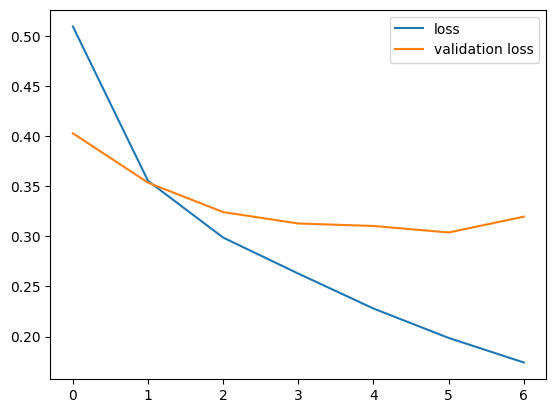

In [32]:
plt.plot(res.history['loss'],label='loss')
plt.plot(res.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

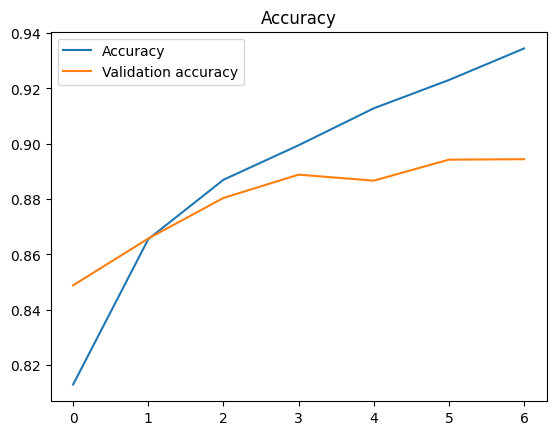

In [33]:
plt.plot(res.history['accuracy'],label='Accuracy')
plt.plot(res.history['val_accuracy'],label='Validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [50]:
yhat=model.predict(x_test).argmax(axis=1)
yhat

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [52]:
from sklearn.metrics import confusion_matrix
pred_tab=confusion_matrix(y_test,yhat)

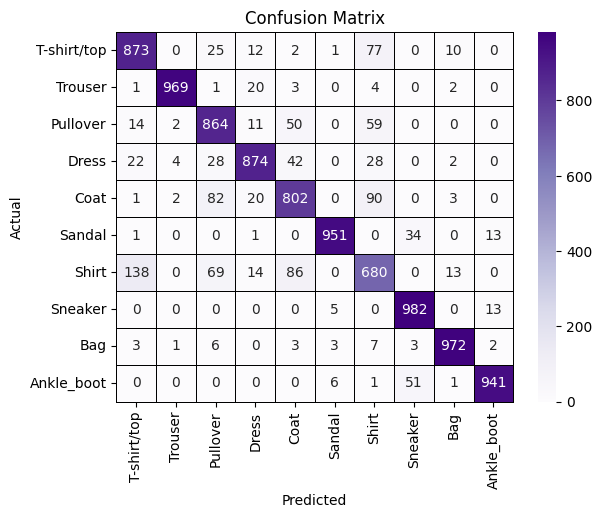

In [80]:
import seaborn as sns
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle_boot'''.split()
sns.heatmap(data=pred_tab,annot=True,fmt='.0f',linecolor='black',
            clip_on=False,yticklabels=labels,xticklabels=labels,
            linewidth=0.5,cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

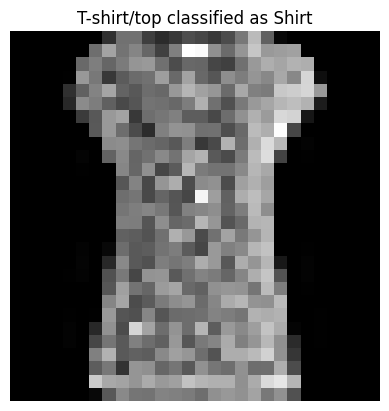

In [98]:
# See an image which was predicted wrong
wrong_pred=np.where(yhat!=y_test)[0]
id=np.random.choice(wrong_pred)
plt.imshow(x_test[id].reshape(28,28),cmap='gray')
plt.title(f'{labels[y_test[id]]} classified as {labels[yhat[id]]}')
plt.axis('off')
plt.show()